# Iris Data Analysis and Modeling

Problem Statement:  
We want to predict flower species using predictors provided by the iris dataset


### Setup

In [4]:
# importing libraries
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
sns.set()

### Load Data
Load the iris dataset using scikit-learn's built-in datasets.

In [8]:
data = datasets.load_iris()

In [9]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(data["DESCR"]) # Print summary of iris dataset

In [ ]:
data["data"][:5] # Returns the vectors for each column in the dataset (4 columns)

In [ ]:
data["feature_names"]

In [ ]:
data["target"]

In [17]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Create Pandas DataFrame 


In [22]:
iris = pd.DataFrame(data["data"], columns = data["feature_names"])

In [ ]:
iris

In [23]:
iris["target"] = data["target"]

In [22]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Basic Descriptive Statistics

In [10]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Distributions of Variables

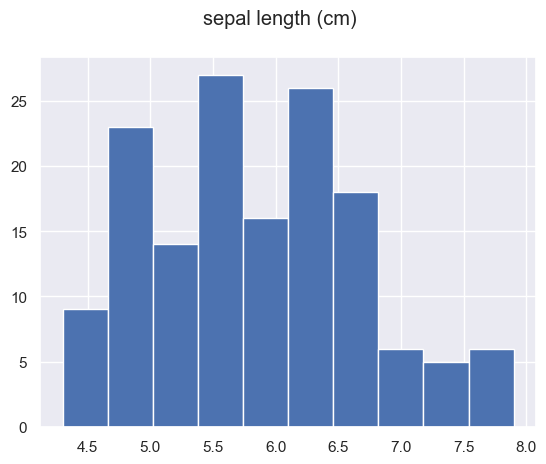

In [13]:
col = "sepal length (cm)"
iris[col].hist()
plt.suptitle(col)
plt.show()

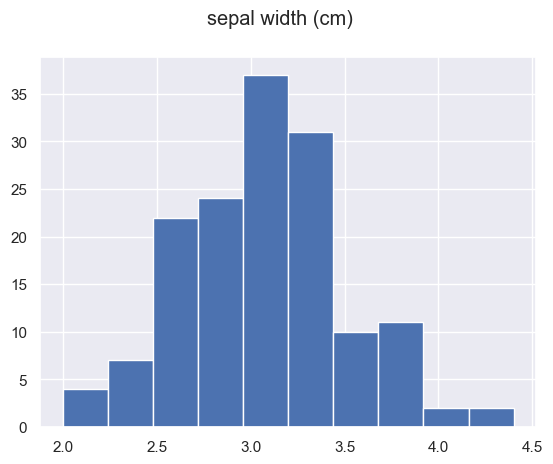

In [14]:
col = "sepal width (cm)"
iris[col].hist()
plt.suptitle(col)
plt.show()

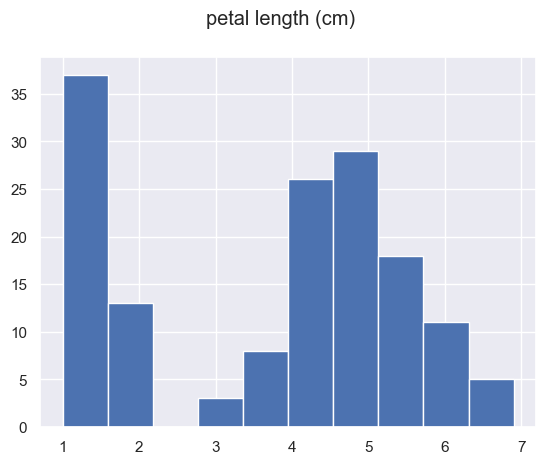

In [15]:
col = "petal length (cm)"
iris[col].hist()
plt.suptitle(col)
plt.show()

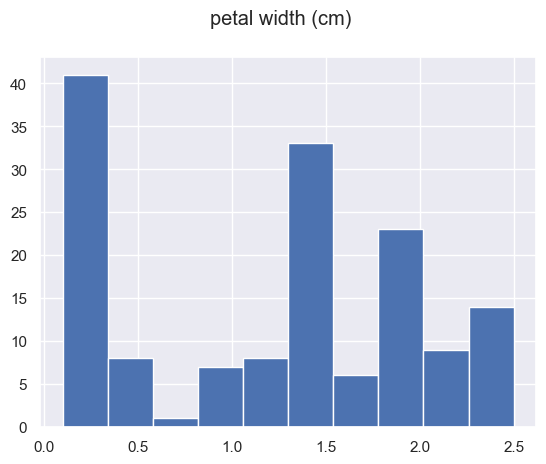

In [16]:
col = "petal width (cm)"
iris[col].hist()
plt.suptitle(col)
plt.show()

### Relationship of Features with Response

In [29]:
# Create new column with species name (categorical variable)
iris["target_name"] = iris["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

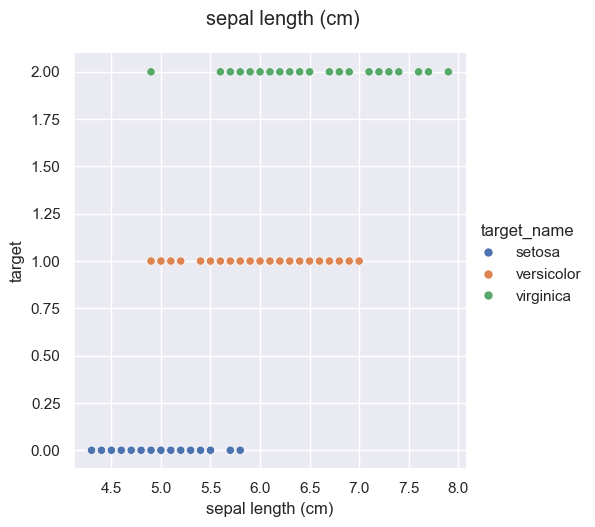

In [33]:
col = "sepal length (cm)"
sns.relplot(data = iris, x = col, y = "target", hue = "target_name")
plt.suptitle(col, y = 1.05)
plt.show()

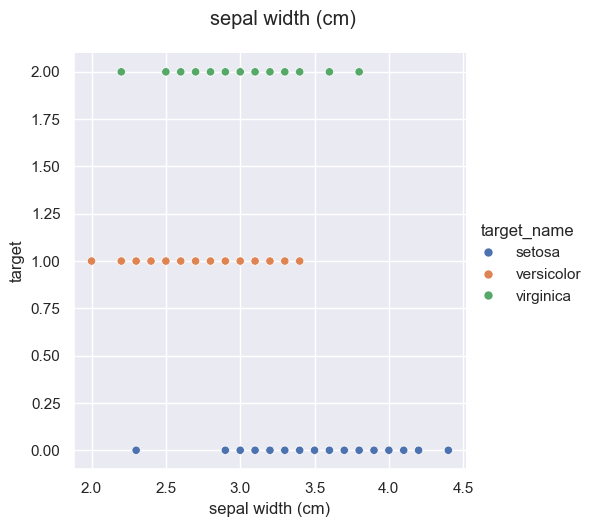

In [34]:
col = "sepal width (cm)"
sns.relplot(data = iris, x = col, y = "target", hue = "target_name")
plt.suptitle(col, y = 1.05)
plt.show()

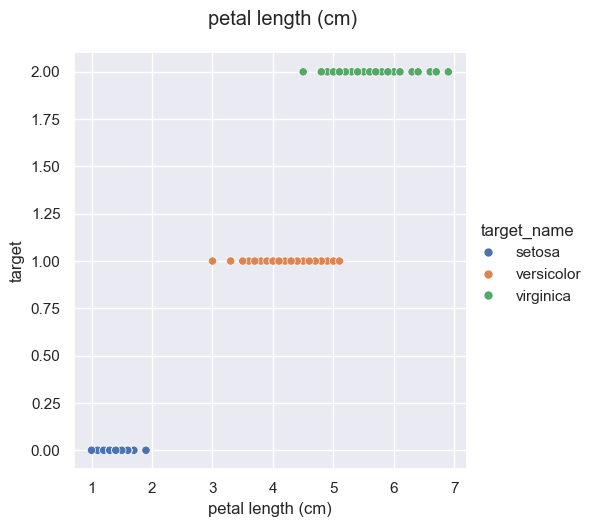

In [38]:
col = "petal length (cm)"
sns.relplot(data = iris, x = col, y = "target", hue = "target_name")
plt.suptitle(col, y = 1.05)
plt.show()

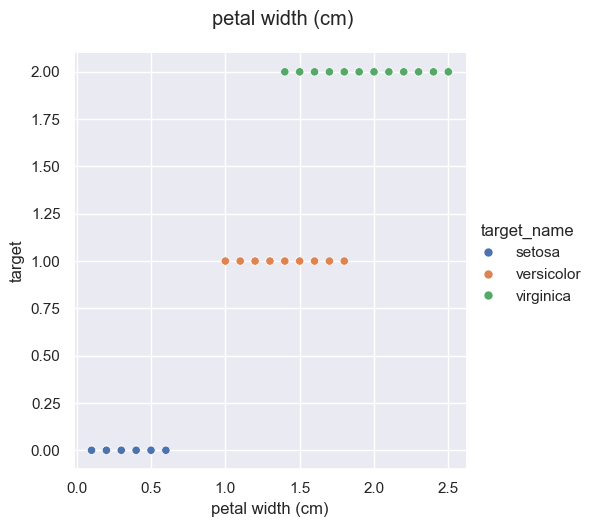

In [37]:
col = "petal width (cm)"
sns.relplot(data = iris, x = col, y = "target", hue = "target_name")
plt.suptitle(col, y = 1.05)
plt.show()

### Pairplotting

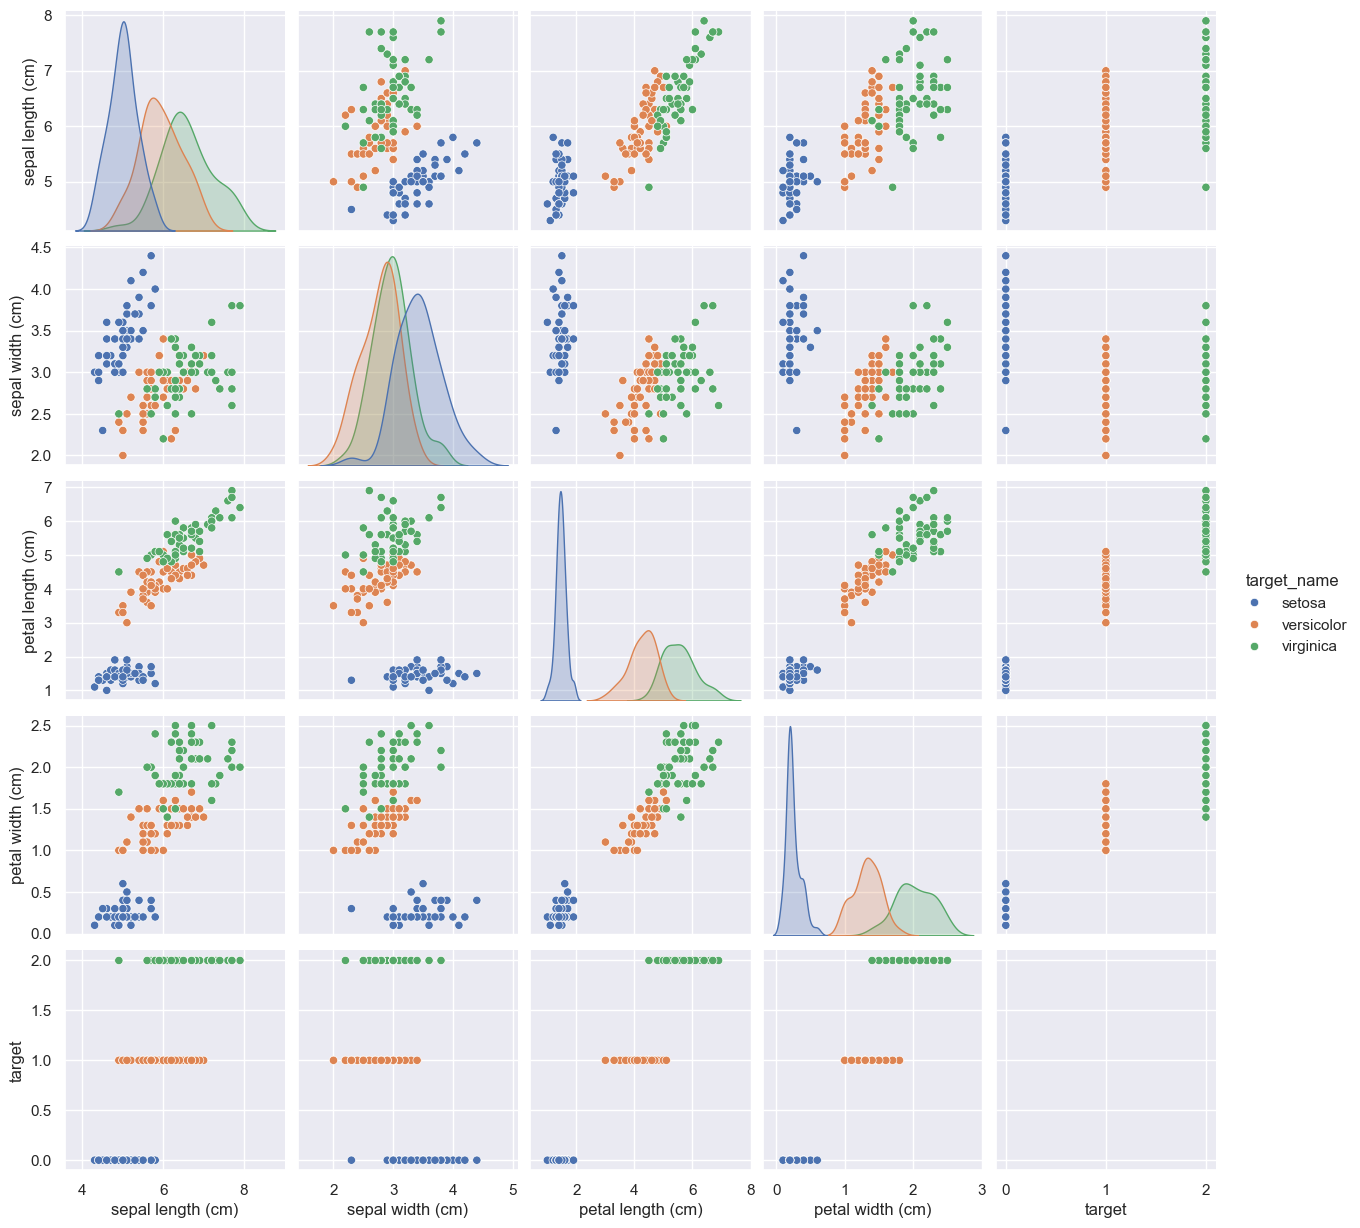

In [40]:
sns.pairplot(iris, hue = "target_name")

### Training and Testing sets

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
iris_train, iris_test = train_test_split(iris, test_size = 0.25)

In [44]:
iris_train.shape

(112, 6)

In [46]:
iris_test.shape

(38, 6)

In [47]:
iris_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
96,5.7,2.9,4.2,1.3,1,versicolor
2,4.7,3.2,1.3,0.2,0,setosa
39,5.1,3.4,1.5,0.2,0,setosa
41,4.5,2.3,1.3,0.3,0,setosa
123,6.3,2.7,4.9,1.8,2,virginica


### Prepare Data For Modeling

In [48]:
X_train = iris_train.drop(columns = ["target", "target_name"]).values
y_train = iris_train["target"].values

### Baseline Modeling
Manually look at the data and decide cutoff points for classifications

In [49]:
def single_feature_prediction(petal_length):
    """Predicts the Iris species given the petal length"""
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [50]:
manual_y_predictions = np.array([single_feature_prediction(val) for val in X_train[:, 2]])

In [56]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train) * 100

In [58]:
print(manual_model_accuracy)

95.53571428571429


### Modeling Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression()

### Using validation set to evaluate model

In [68]:
# Xt stands for "X_train" and Xv stands for "X_validation"
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size = 0.25)

In [69]:
model.fit(Xt, yt)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [70]:
y_pred = model.predict(Xv)

In [71]:
np.mean(y_pred == yv) * 100

np.float64(96.42857142857143)

In [72]:
model.score(Xv, yv)

0.9642857142857143

### Using Cross-Validation to evaluate model

In [80]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [81]:
model = LogisticRegression(max_iter = 200)

In [83]:
accuracies = cross_val_score(model, X_train, y_train, cv = 5, scoring = "accuracy")

In [85]:
accuracies

array([1.        , 0.95652174, 0.90909091, 1.        , 1.        ])

In [84]:
np.mean(accuracies)

np.float64(0.9731225296442687)

### Misclassification

In [88]:
y_pred = cross_val_predict(model, X_train, y_train, cv = 5) 
# Uses the training data from the current iteration to predict for the testing fold

In [87]:
y_pred

array([1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2, 0,
       2, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2,
       1, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1,
       2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 2,
       0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2,
       2, 0])

In [99]:
predicted_correctly_mask = y_pred == y_train

In [91]:
not_predicted_correctly = ~predicted_correctly_mask

In [92]:
X_train[not_predicted_correctly]

array([[4.9, 2.5, 4.5, 1.7],
       [6. , 2.7, 5.1, 1.6],
       [5.9, 3.2, 4.8, 1.8]])

In [101]:
predictions = iris_train.copy()

In [102]:
predictions["correct_prediction"] = predicted_correctly_mask

In [ ]:
df_predictions["correct_prediction"] = predicted_correctly_mask

In [ ]:
df_predictions["prediction"] = y_pred

In [ ]:
df_predictions["prediction_label"] = df_predictions["prediction"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [ ]:
df_predictions.head()

In [ ]:
sns.scatterplot(x = "petal length (cm)", y = "petal width (cm)", hue = "prediction_label", data = df_predictions)

In [ ]:
sns.scatterplot(x = "petal length (cm)", y = "petal width (cm)", hue = "target_name", data = df_predictions)

In [ ]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize = (10, 10))
    axs = axs.flatten()
    sns.scatterplot(x = "petal length (cm)", y = "petal width (cm)", hue = "prediction_label", data = df_predictions, ax = axs[0])
    sns.scatterplot(x = "petal length (cm)", y = "petal width (cm)", hue = "target_name", data = df_predictions, ax = axs[1])
    sns.scatterplot(x = "petal length (cm)", y = "petal width (cm)", hue = "correct_prediction", data = df_predictions, ax = axs[2])

    plt.show()

In [ ]:
plot_incorrect_predictions(df_predictions, "petal length (cm)", "petal width (cm)")

### Model Tuning

What is model tuning?

Model tuning is determining the parameters of the model (also known as "hyperparameters") that maximize the performance of the model.

In [ ]:
model = LogisticRegression(max_iter = 200, C = 1)
accs = cross_val_score(model, X_train, y_train, cv = 5, scoring = "accuracy")
np.mean(accs) * 100

### Final Model

In [ ]:
model = LogisticRegression(max_iter = 200, C = 1)

### Testing the model on the test set 

In [ ]:
X_test = iris_test.drop(columns = ["target", "target_name"]).values
y_test = iris_test["target"].values

In [ ]:
X_test.shape

### Train final model on full training set

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
test_set_correct = y_test_pred == y_test
test_set_acc = np.mean(test_set_correct) * 100
print(f"Test set accuracy: {test_set_acc}")

In [ ]:
df_predictions_test = iris_test.copy()
df_predictions_test["correct_prediction"] = test_set_correct
df_predictions_test["prediction"] = y_test_pred
df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [ ]:
df_predictions_test.head()

In [ ]:
plot_incorrect_predictions(df_predictions_test, "petal length (cm)", "petal width (cm)")

### Conclusion

Achieved a 100% accuracy on the test data set using a logistic regression model